In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


In [27]:
class MiniMNISTDataset(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        self.X = self.data.iloc[:, :-1].values  # Les caractéristiques (features)
        self.y = self.data.iloc[:, -1].values   # Les étiquettes (labels)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Convertir les données en tenseurs
        X_tensor = torch.tensor(self.X[idx], dtype=torch.float32)
        y_tensor = torch.tensor(self.y[idx], dtype=torch.long)
        return X_tensor, y_tensor


In [31]:
# Charger le dataset
train_dataset = MiniMNISTDataset('mini_mnist.csv')

# Créer le DataLoader
batch_size = 32  # la taille du batch
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)


In [32]:
class FullyConnectedNN(nn.Module):
    def __init__(self):
        super(FullyConnectedNN, self).__init__()
        self.fc1 = nn.Linear(72, 20)  # Couche d'entrée
        self.fc2 = nn.Linear(20, 10)   # Couche cachée
        self.fc3 = nn.Linear(10, 10)   # Couche cachée
        self.fc4 = nn.Linear(10, 10)   # Couche de sortie

    def forward(self, x):
        x = nn.ReLU()(self.fc1(x))  # Activation ReLU
        x = nn.ReLU()(self.fc2(x))  # Activation ReLU
        x = nn.ReLU()(self.fc3(x))  # Activation ReLU
        return nn.Softmax(dim=1)(x)  # Activation Softmax à la sortie


In [33]:
model = FullyConnectedNN()
criterion = nn.CrossEntropyLoss()  # Fonction de perte
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Optimiseur (SGD)


In [34]:
num_epochs = 50  # Nombre d'époques


In [36]:
# Liste pour stocker les pertes et précisions
losses = []
accuracies = []

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Réinitialiser les gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass et optimisation
        loss.backward()
        optimizer.step()

        # Stocker la perte
        losses.append(loss.item())

    # Calculer l'accuracy après chaque époque
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    accuracies.append(accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%')


Epoch [1/50], Loss: 2.2972, Accuracy: 13.20%
Epoch [2/50], Loss: 2.2953, Accuracy: 13.20%
Epoch [3/50], Loss: 2.3008, Accuracy: 13.80%
Epoch [4/50], Loss: 2.3075, Accuracy: 14.00%
Epoch [5/50], Loss: 2.3034, Accuracy: 14.10%
Epoch [6/50], Loss: 2.2980, Accuracy: 14.80%
Epoch [7/50], Loss: 2.3038, Accuracy: 15.00%
Epoch [8/50], Loss: 2.3075, Accuracy: 15.90%
Epoch [9/50], Loss: 2.3032, Accuracy: 16.20%
Epoch [10/50], Loss: 2.3037, Accuracy: 16.70%
Epoch [11/50], Loss: 2.2988, Accuracy: 17.40%
Epoch [12/50], Loss: 2.2902, Accuracy: 17.90%
Epoch [13/50], Loss: 2.2984, Accuracy: 18.30%
Epoch [14/50], Loss: 2.3008, Accuracy: 18.40%
Epoch [15/50], Loss: 2.2979, Accuracy: 18.30%
Epoch [16/50], Loss: 2.2985, Accuracy: 18.60%
Epoch [17/50], Loss: 2.2986, Accuracy: 19.50%
Epoch [18/50], Loss: 2.2999, Accuracy: 19.80%
Epoch [19/50], Loss: 2.2997, Accuracy: 20.00%
Epoch [20/50], Loss: 2.2989, Accuracy: 20.10%
Epoch [21/50], Loss: 2.3070, Accuracy: 20.80%
Epoch [22/50], Loss: 2.3043, Accuracy: 20.8

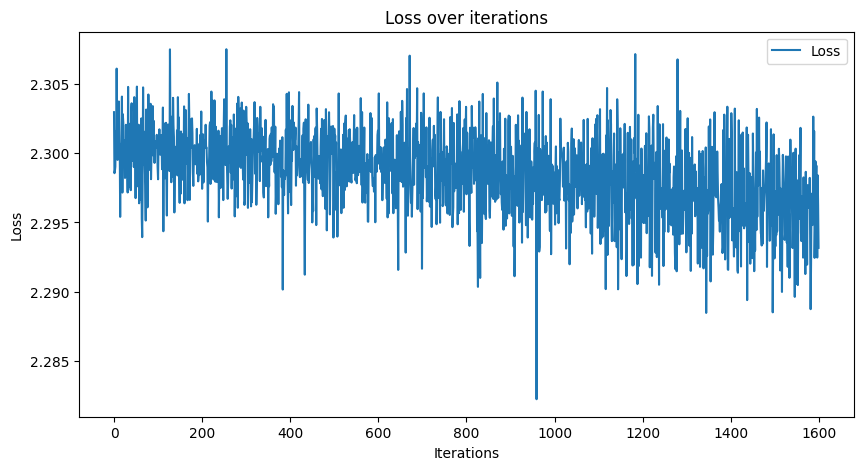

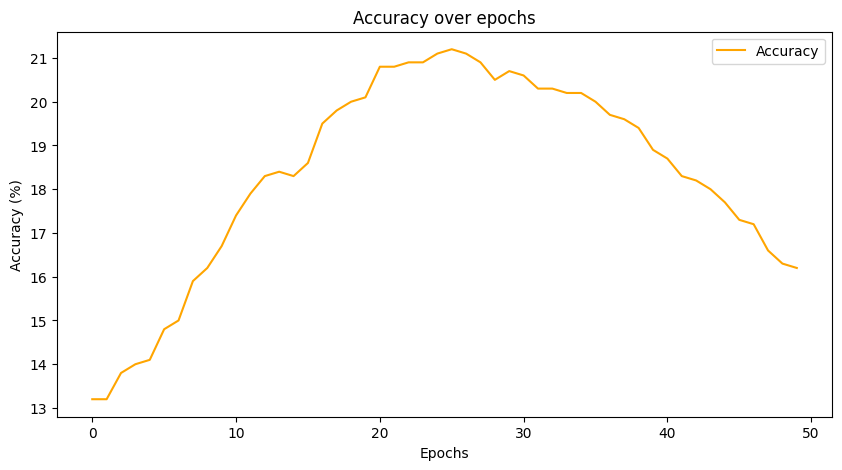

In [37]:
# Visualiser la perte
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over iterations')
plt.legend()
plt.show()

# Visualiser l'accuracy
plt.figure(figsize=(10, 5))
plt.plot(accuracies, label='Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()


In [51]:

import torch
from torch.utils.data import Dataset, DataLoader

class MiniMNISTDataset(Dataset):
    def __init__(self, csv_file):
        import pandas as pd
        self.data = pd.read_csv(csv_file)
        self.labels = self.data.iloc[:, 0].values
        self.images = self.data.iloc[:, 1:].values.astype(np.float32) / 255.0  # Normaliser

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.images[idx].reshape(8, 9)  # Adapter la forme correcte
        label = self.labels[idx]
        return torch.tensor(image).unsqueeze(0), torch.tensor(label)

# Charger le dataset
train_dataset = MiniMNISTDataset("mini_mnist.csv")
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)



